# Imports

In [1]:
from matplotlib import pyplot as plt
from utils import load_pickle, save_pickle, show_mel

import torch

In [2]:
n = '14' # Experiment number

## Generated Melspectrograms

Initialising methods

In [3]:
# Plots all image content of buffer (unless limit is specified)
def plot_buffer(buffer, limit=None):
    for i, d in enumerate(buffer.data):
        if(limit and i == limit): return
        mel = torch.squeeze(d).cpu().numpy()
        show_mel(mel)

In [4]:
# Plots one image from each epoch
def plot_improvement(AorB, minepoch, maxepoch):
    
    assert AorB == 'A' or AorB == 'B', 'Choose a buffer'
    
    for i in range(minepoch, maxepoch):
        if AorB == 'A':
            buffer = load_pickle('pool/'+n+'/a/a_fake_epoch_'+ str(i) +'.pickle')
        if AorB == 'B':
            buffer = load_pickle('pool/'+n+'/b/b_fake_epoch_'+ str(i) +'.pickle')
        plot_buffer(buffer, 1)
        
    return

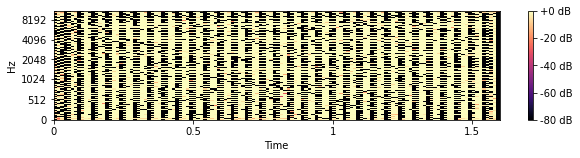

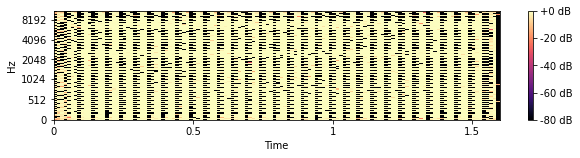

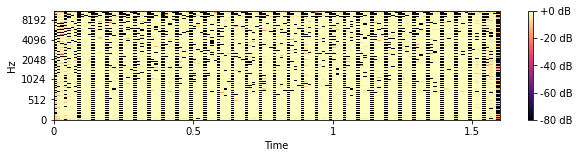

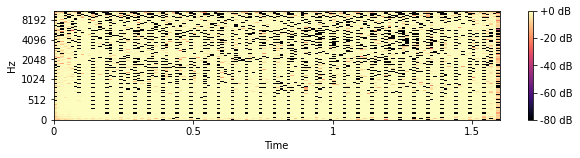

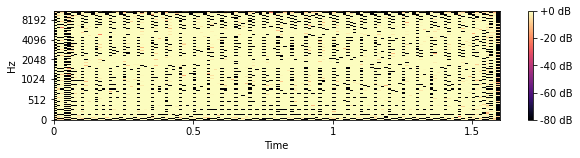

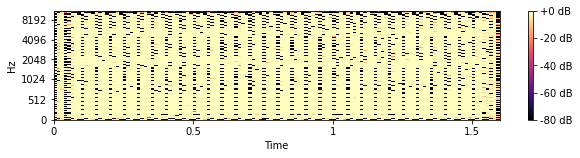

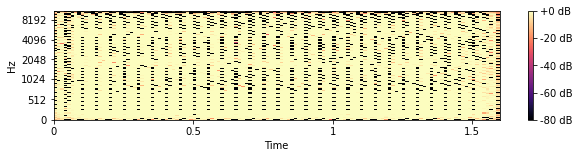

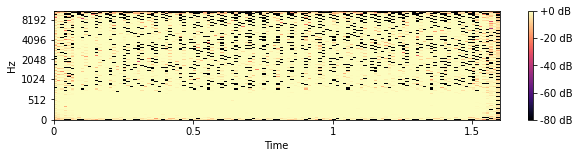

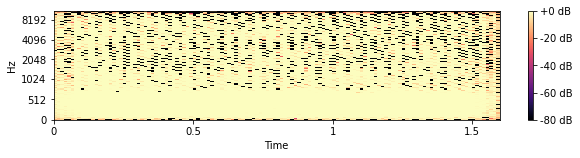

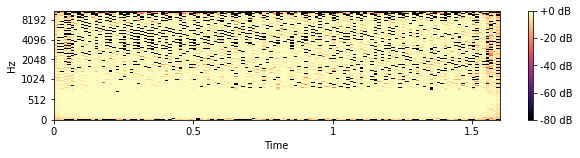

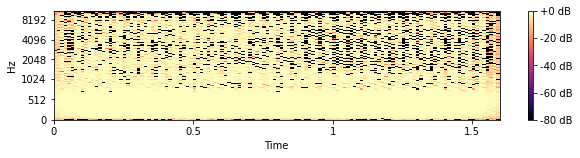

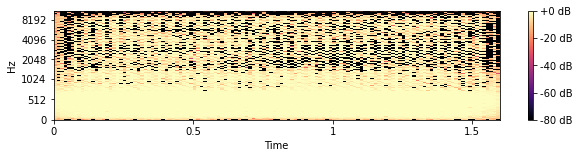

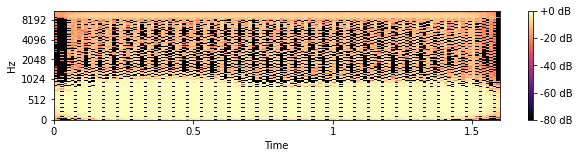

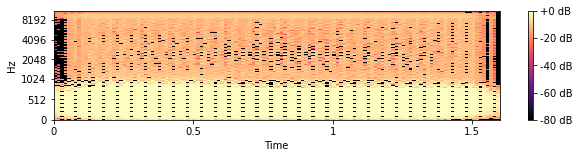

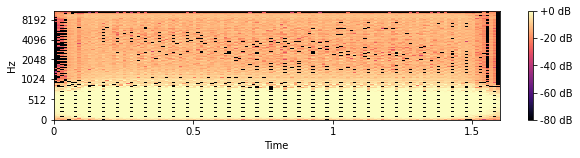

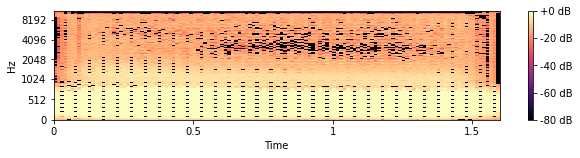

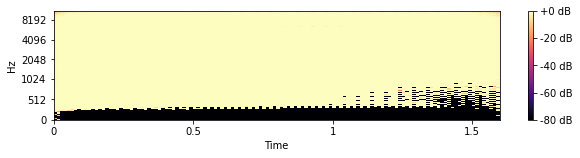

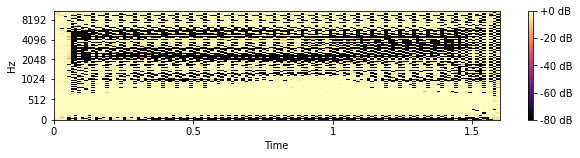

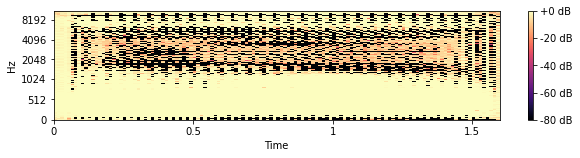

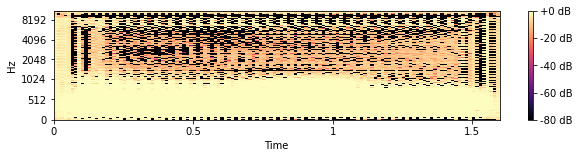

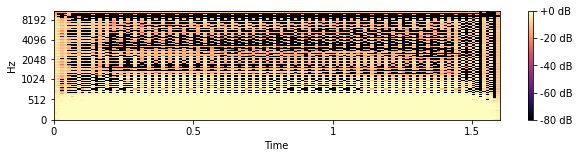

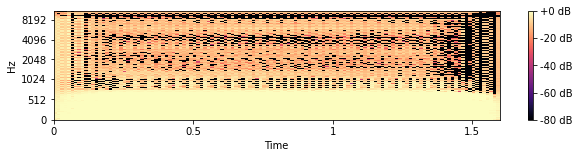

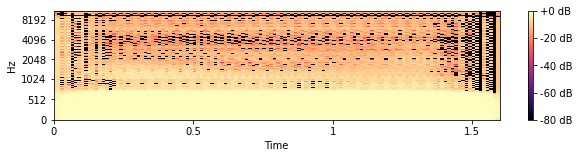

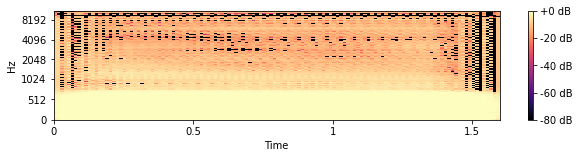

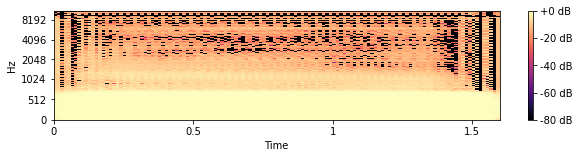

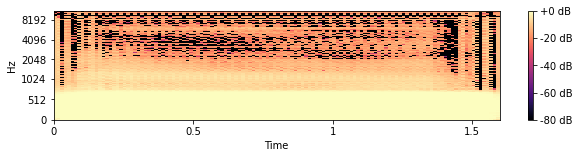

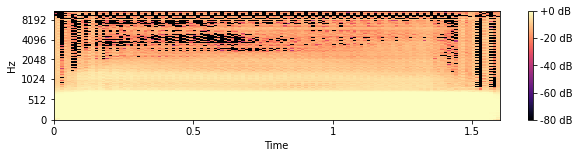

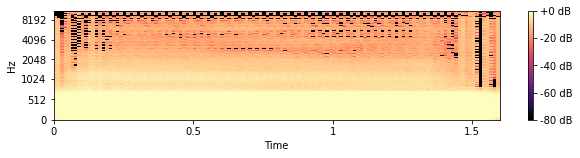

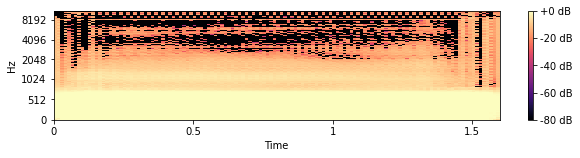

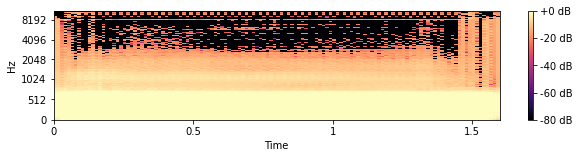

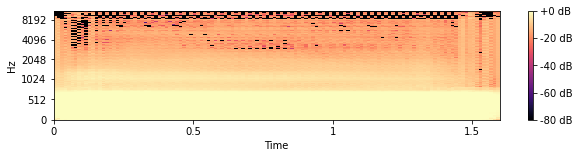

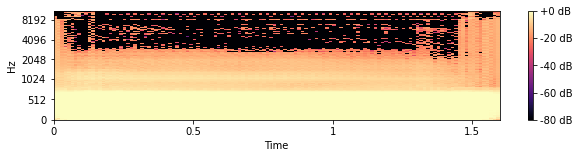

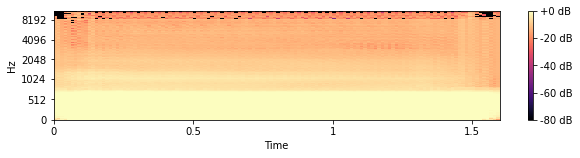

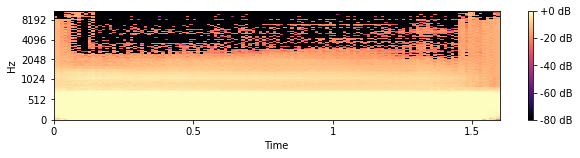

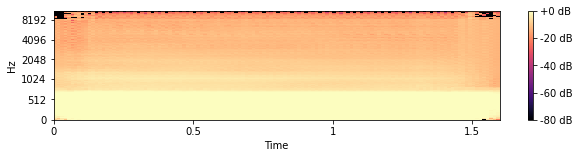

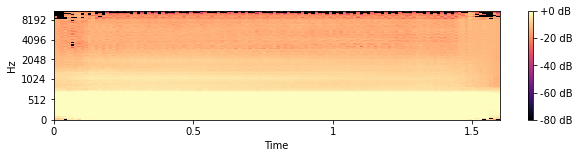

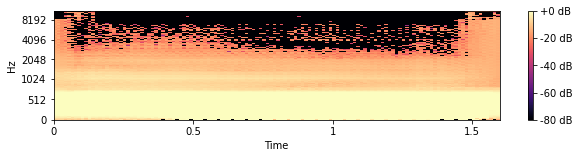

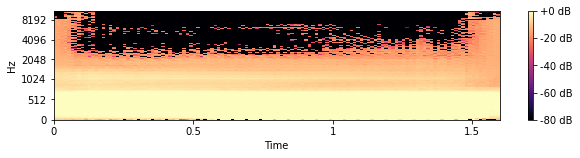

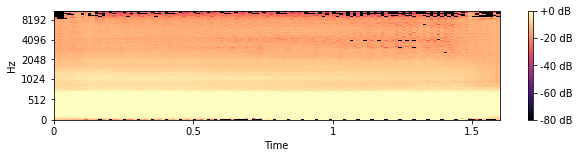

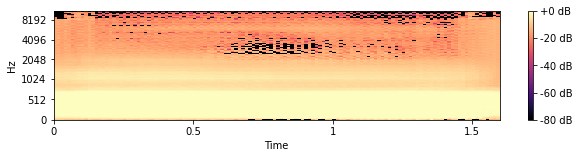

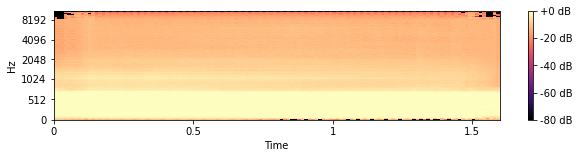

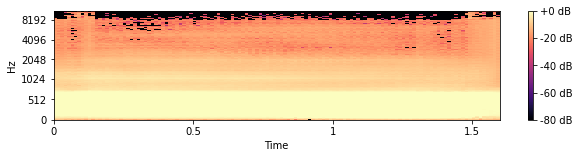

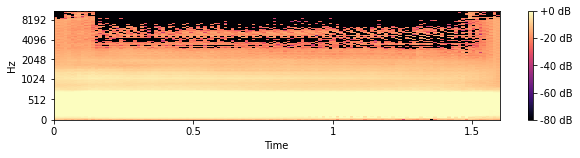

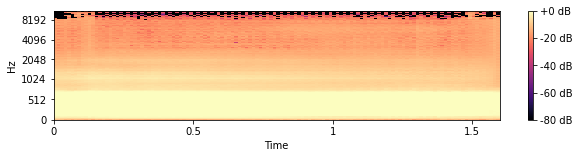

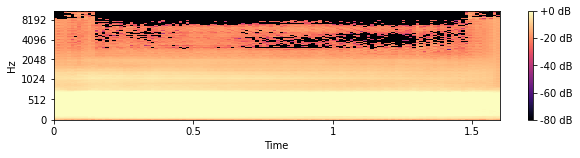

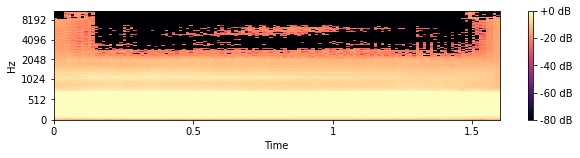

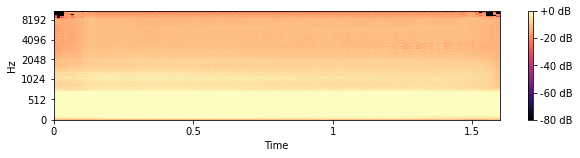

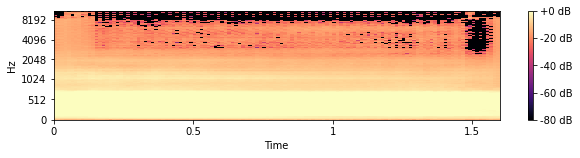

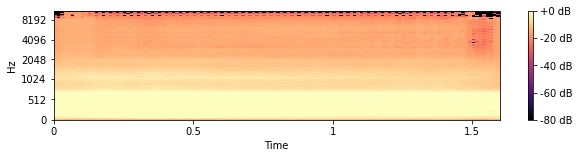

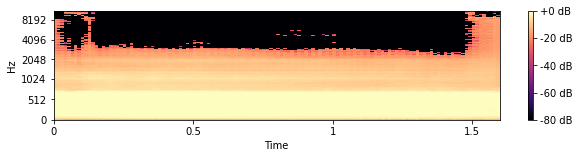

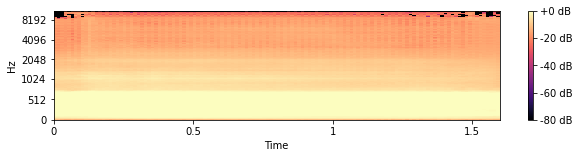

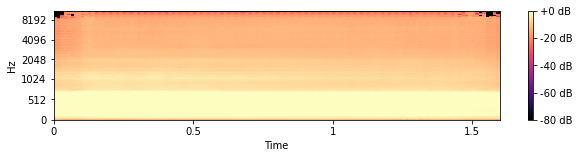

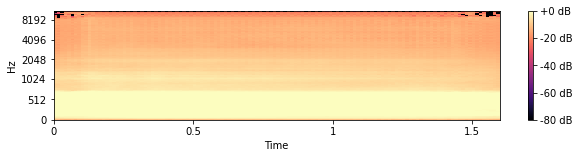

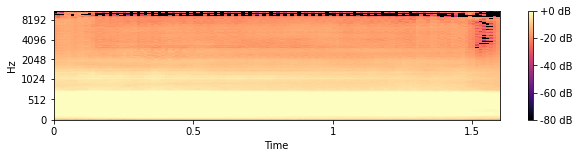

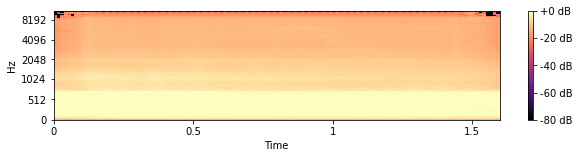

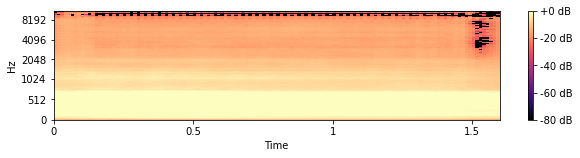

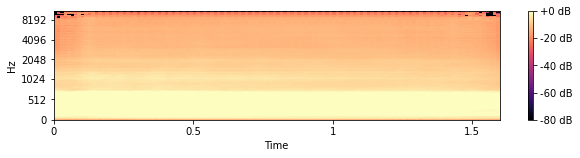

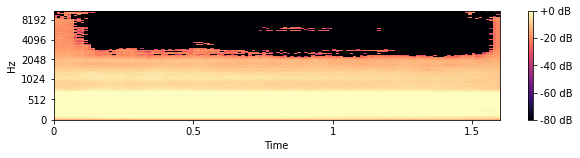

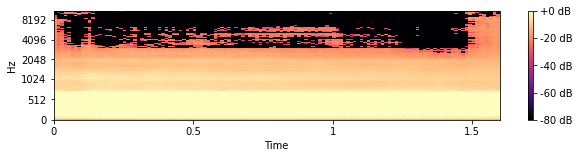

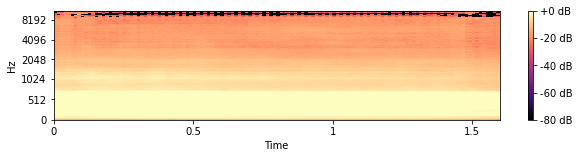

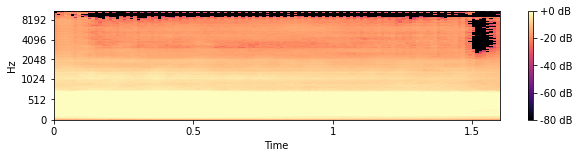

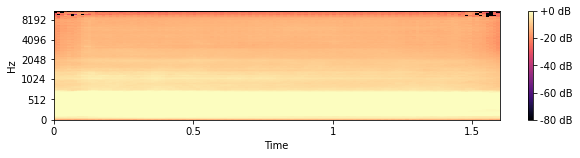

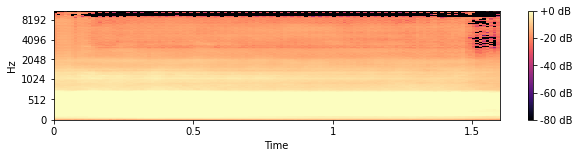

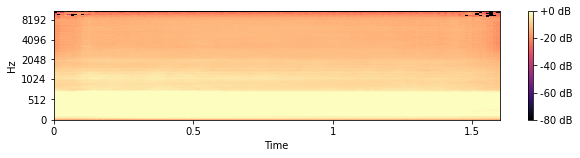

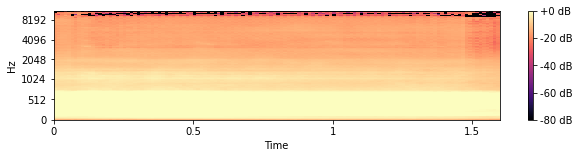

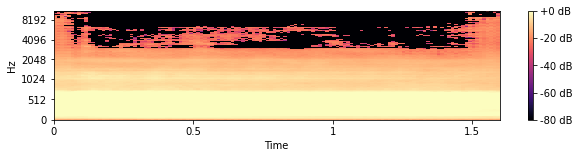

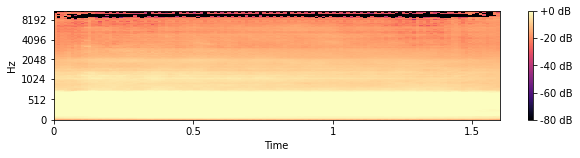

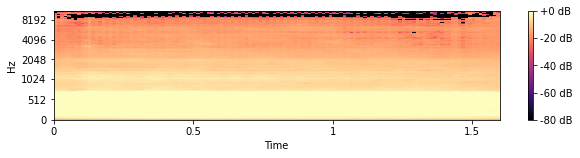

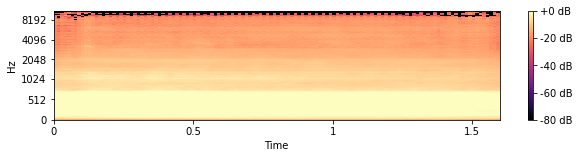

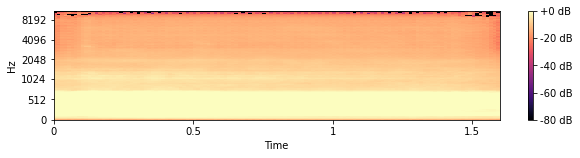

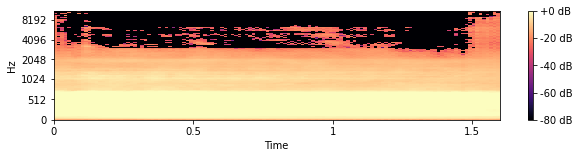

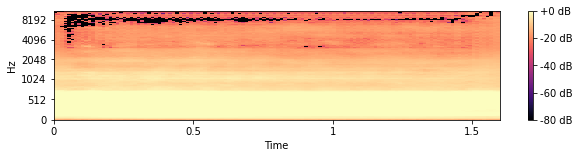

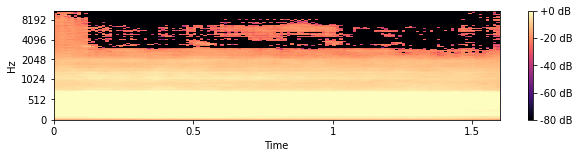

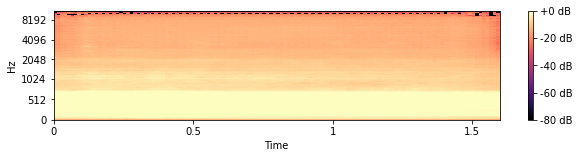

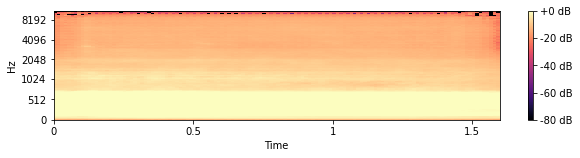

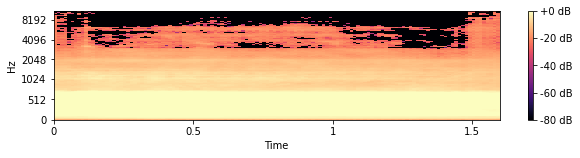

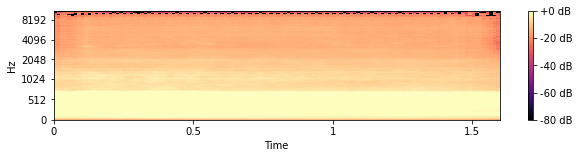

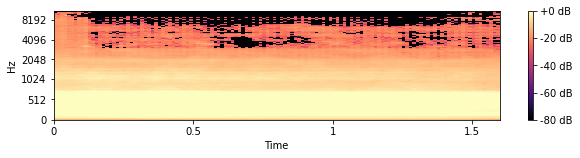

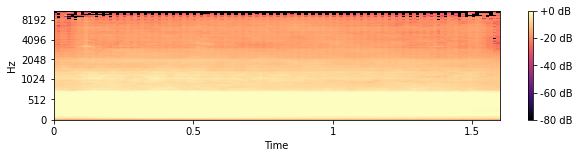

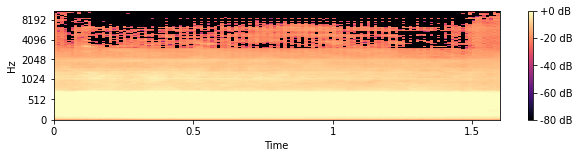

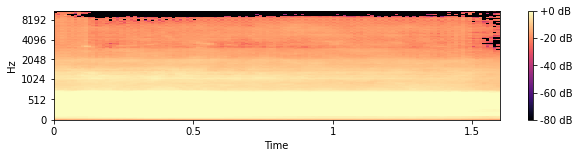

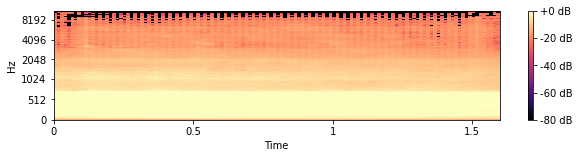

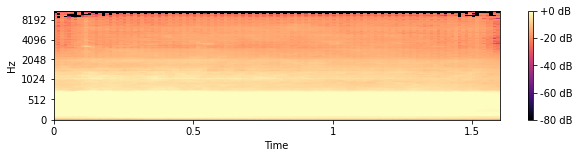

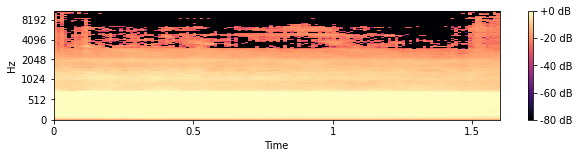

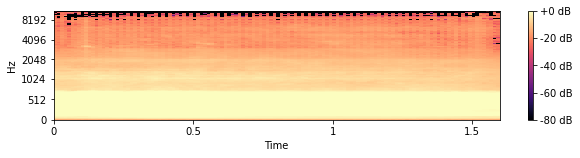

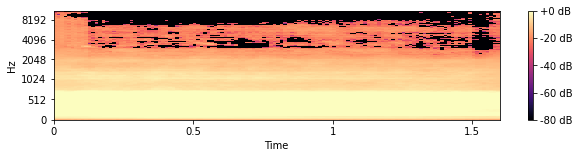

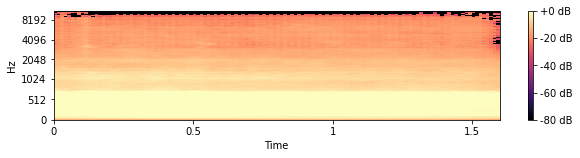

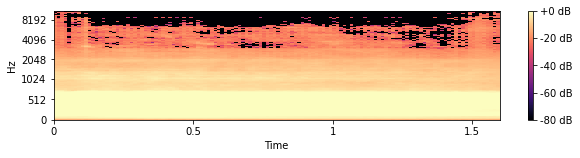

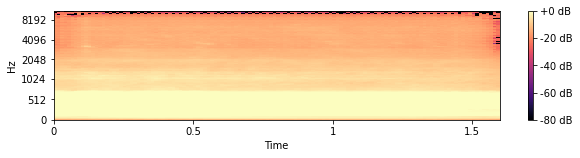

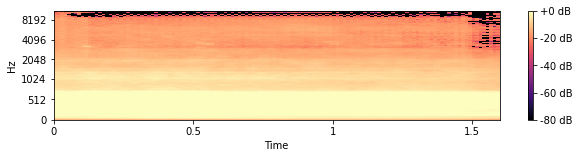

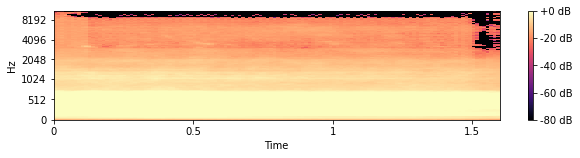

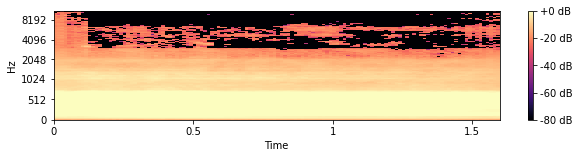

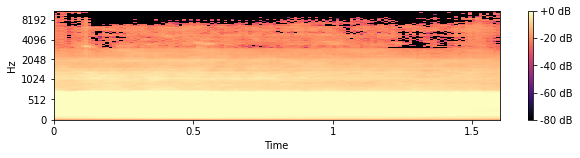

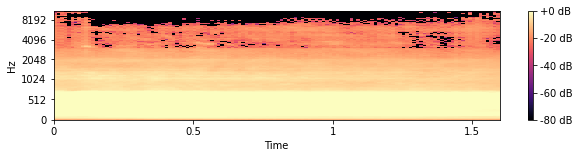

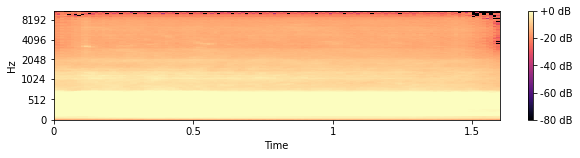

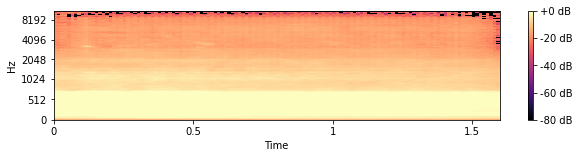

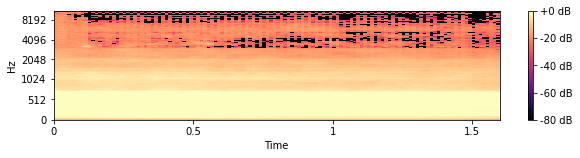

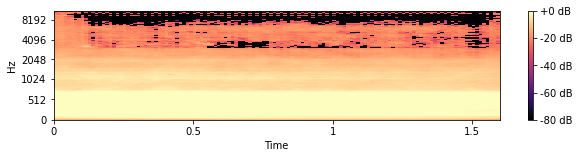

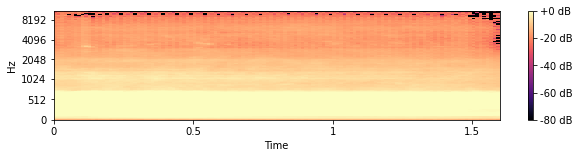

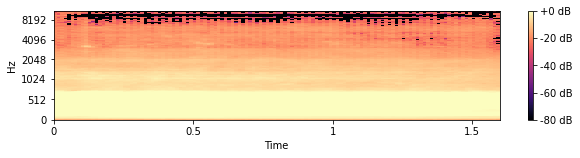

In [6]:
plot_improvement('A', 0, 100)

/homes/rs002/.local/lib/python3.8/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/homes/rs002/.local/lib/python3.8/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/import/scratch-01/rs002/voice-conversion-gan/utils.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 2))


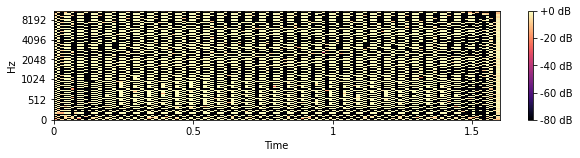

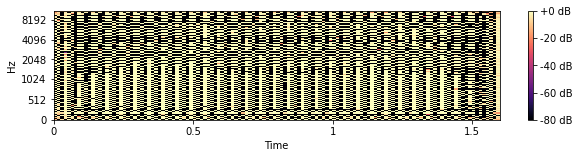

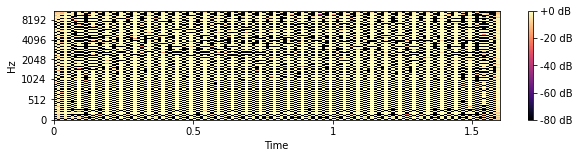

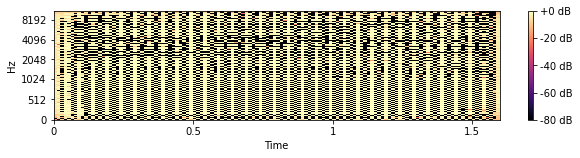

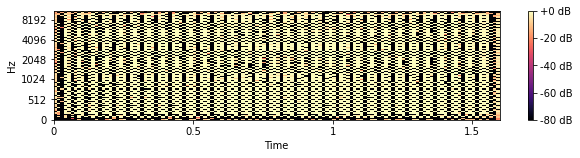

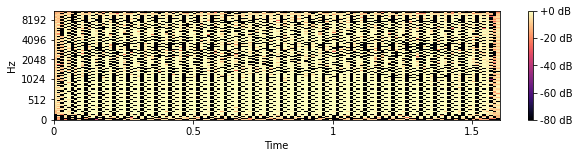

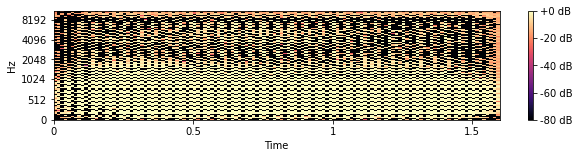

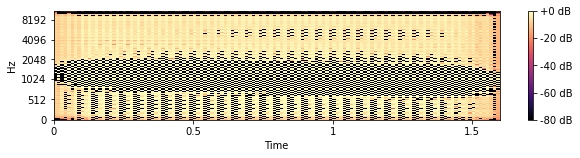

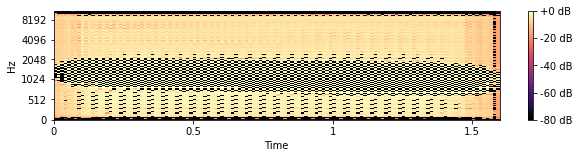

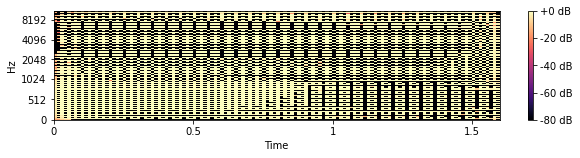

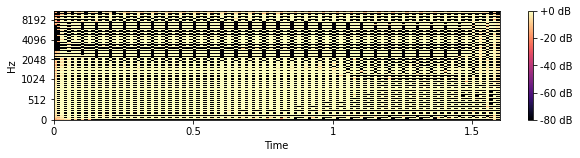

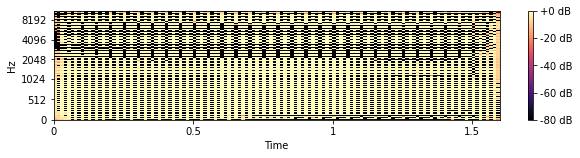

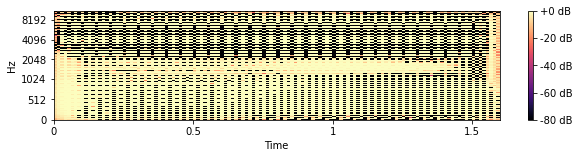

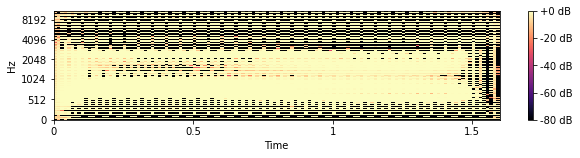

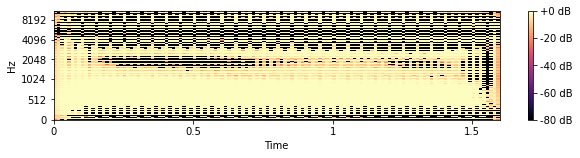

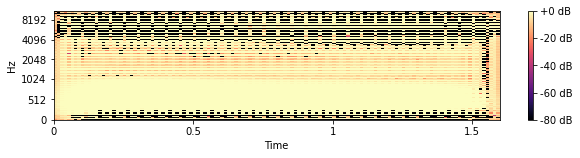

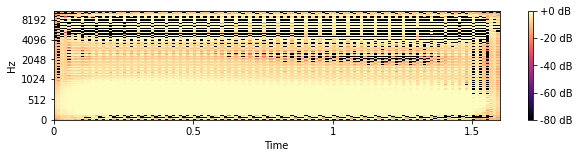

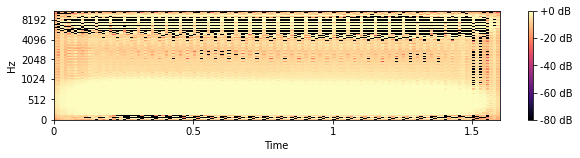

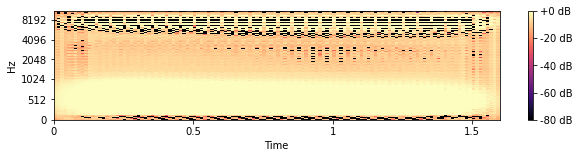

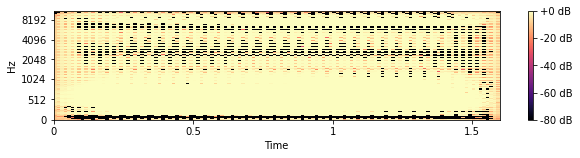

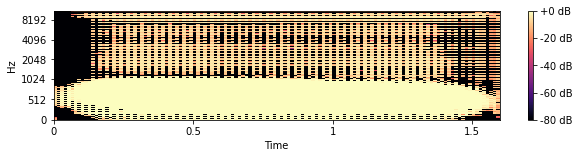

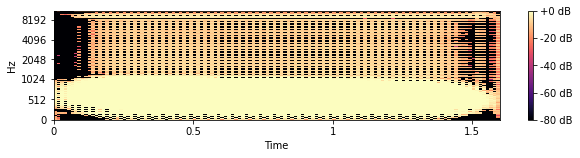

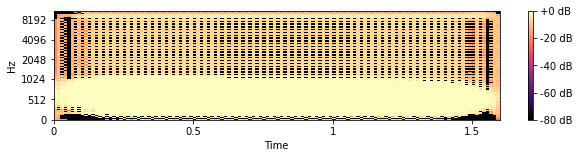

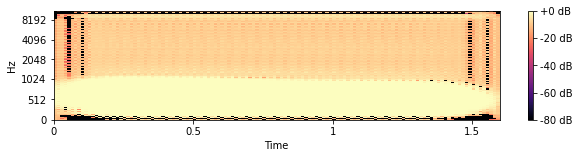

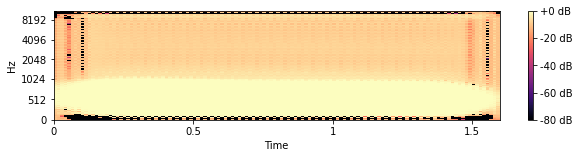

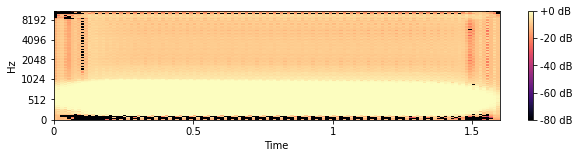

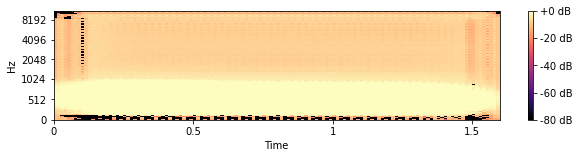

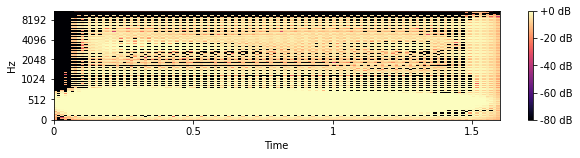

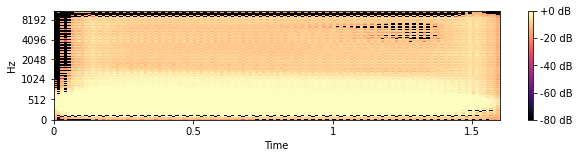

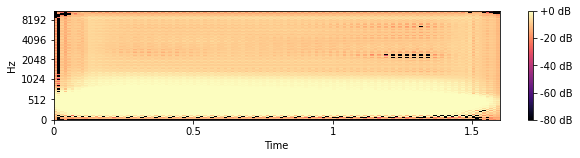

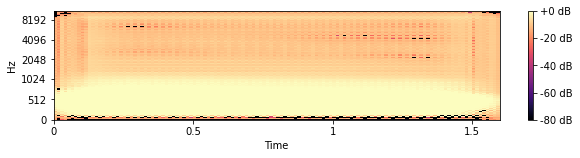

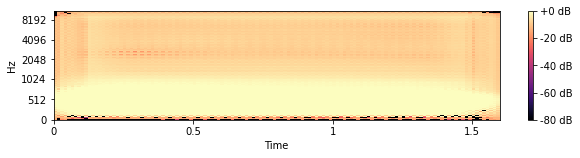

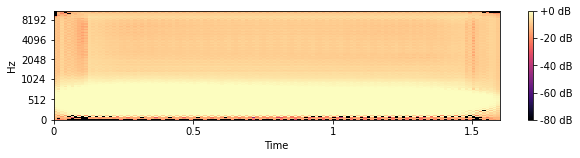

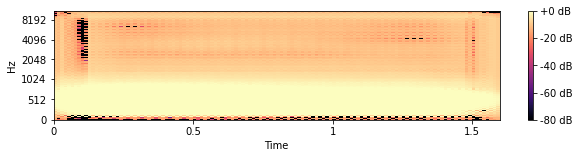

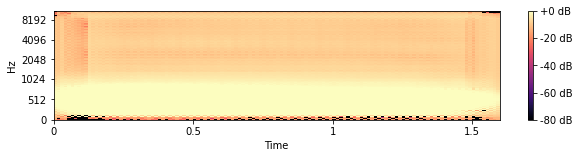

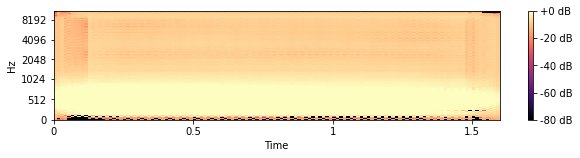

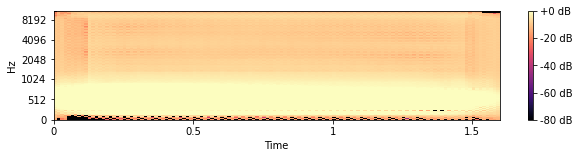

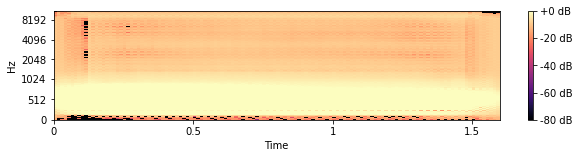

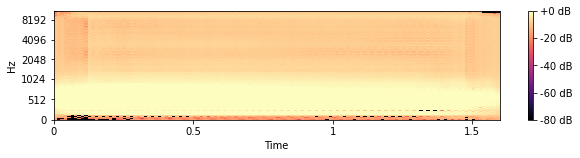

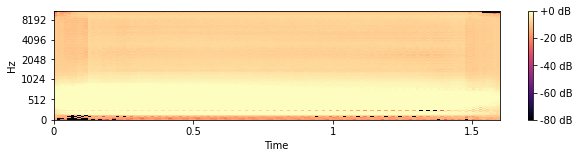

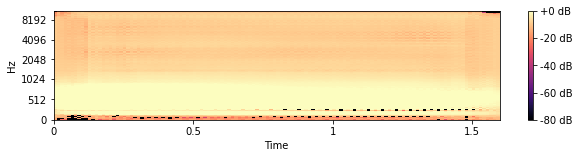

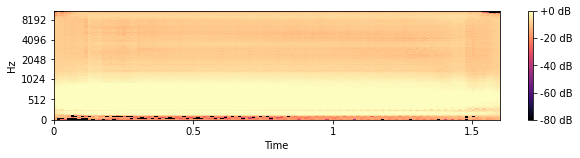

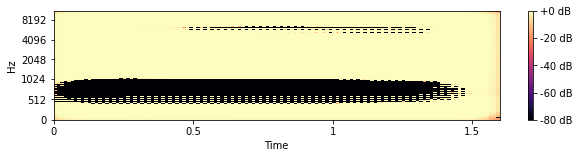

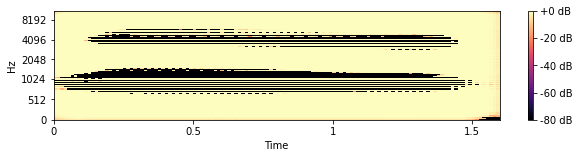

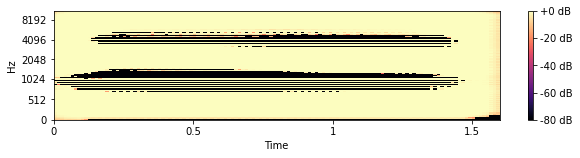

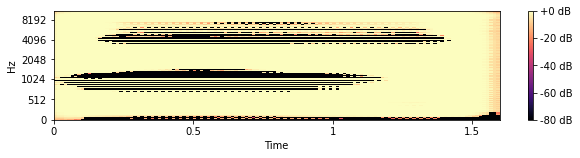

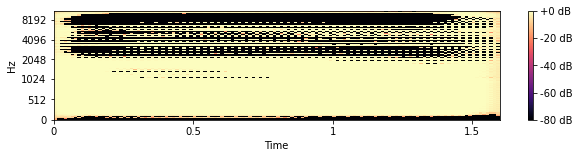

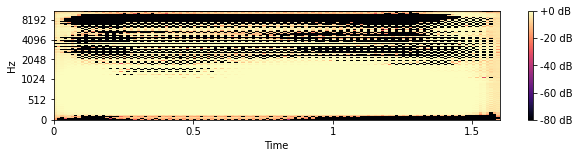

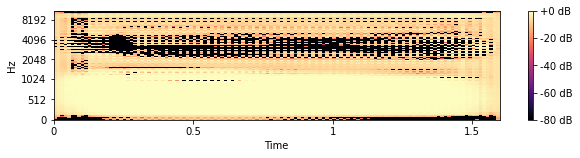

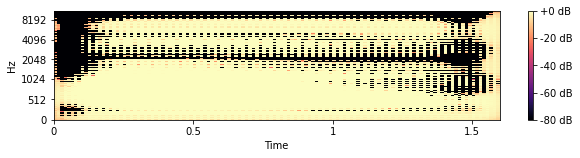

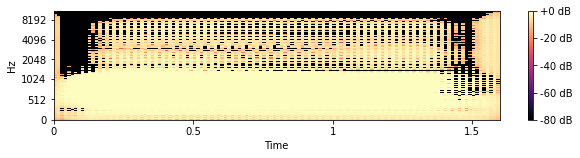

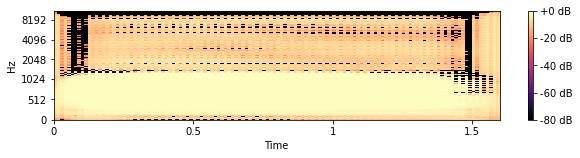

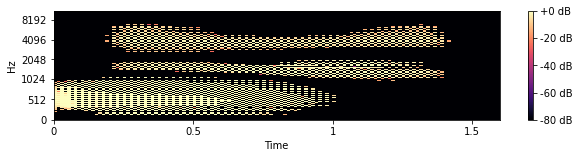

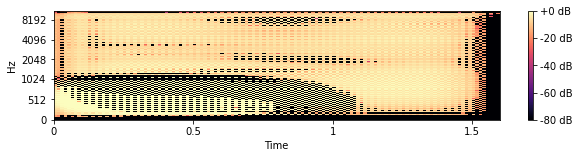

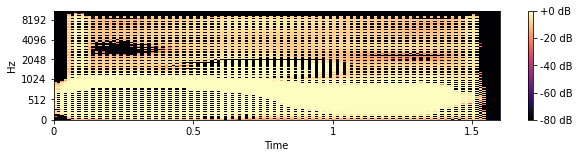

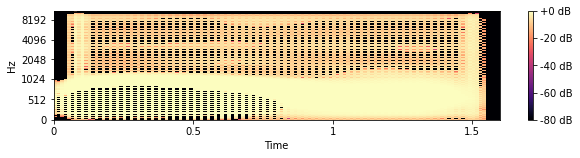

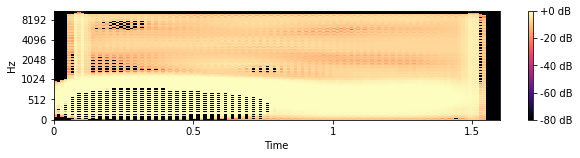

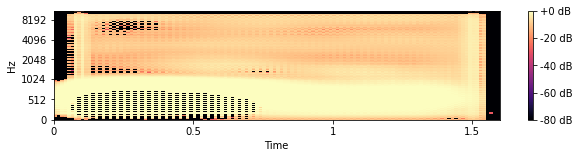

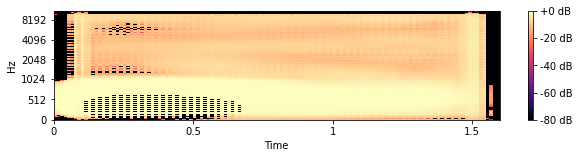

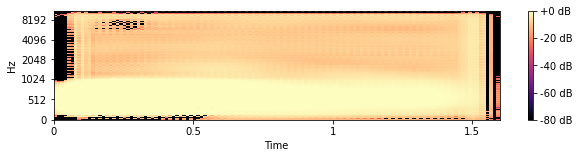

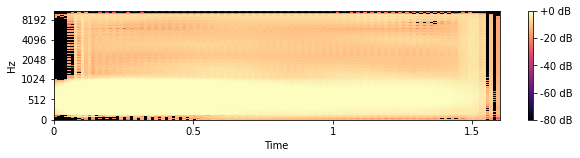

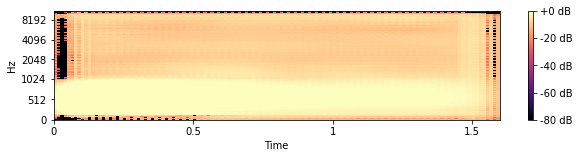

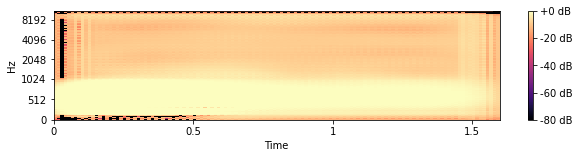

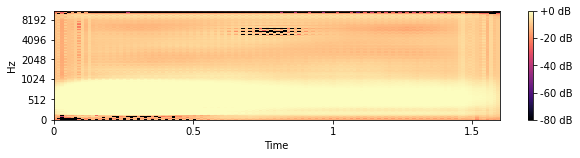

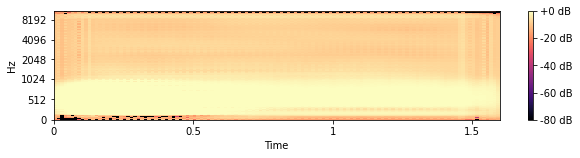

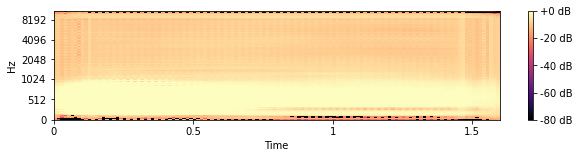

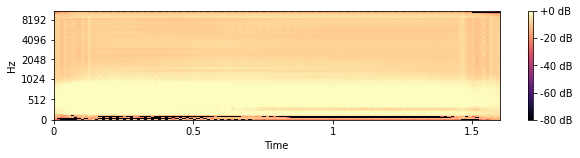

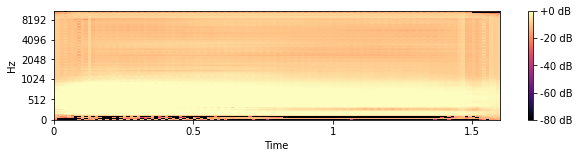

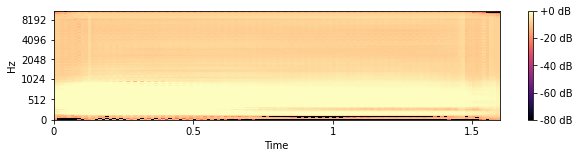

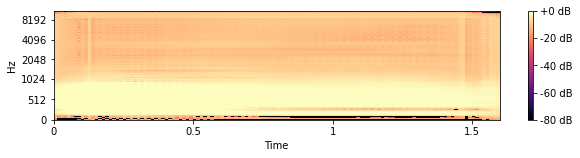

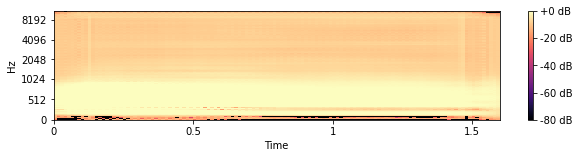

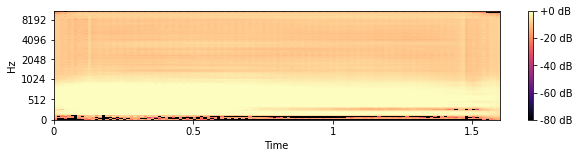

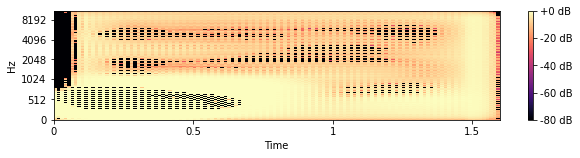

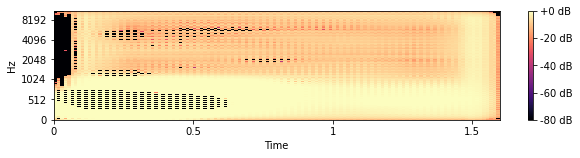

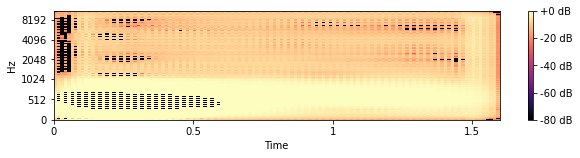

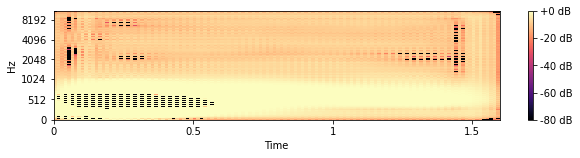

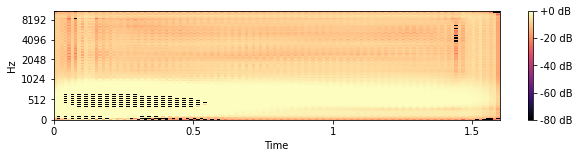

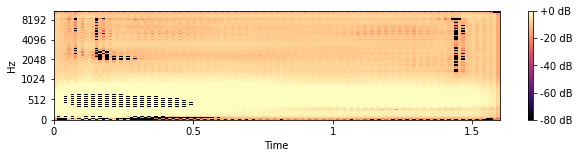

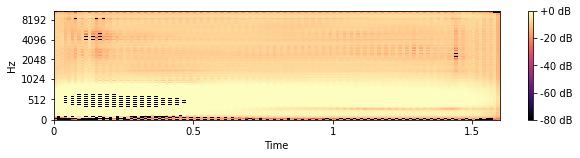

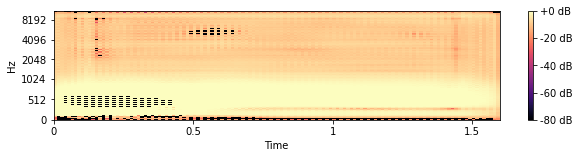

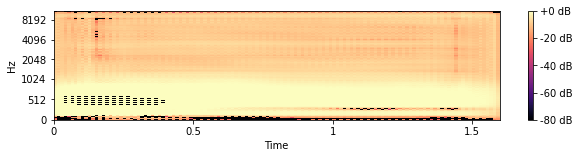

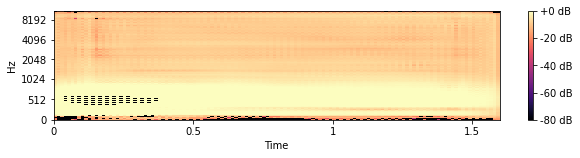

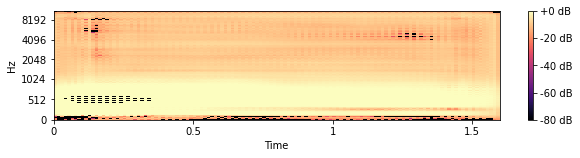

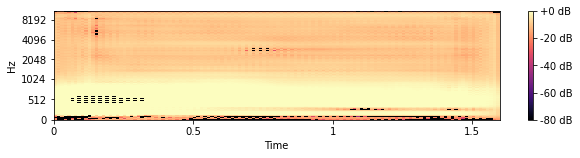

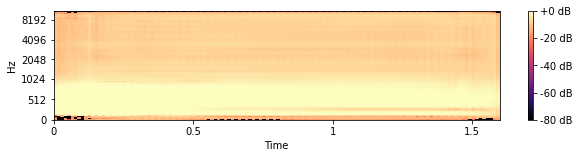

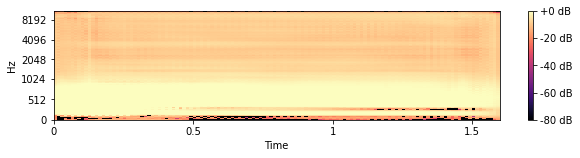

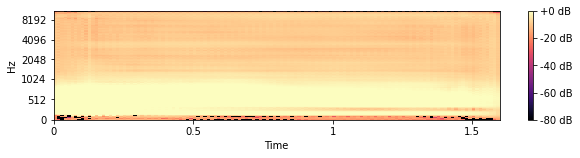

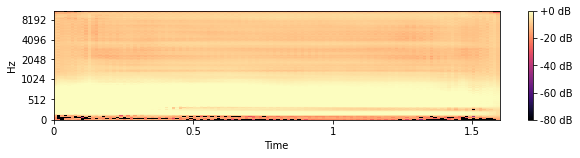

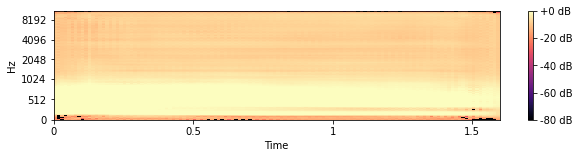

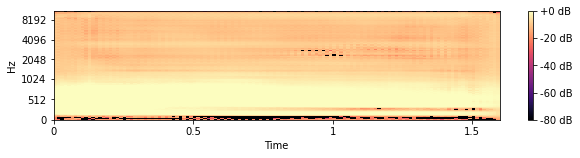

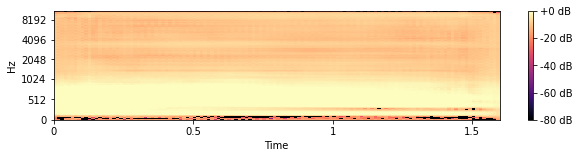

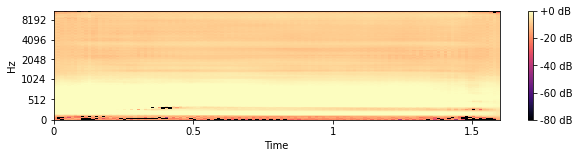

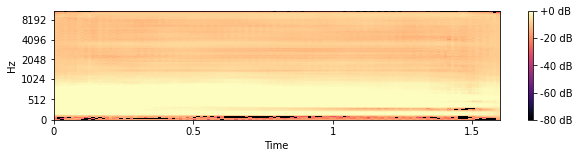

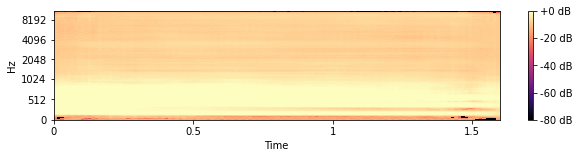

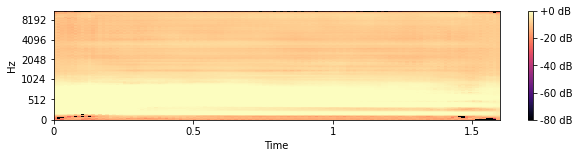

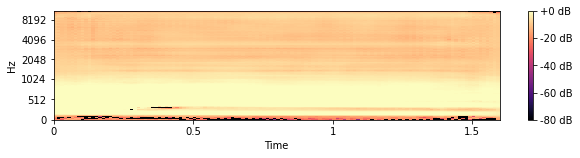

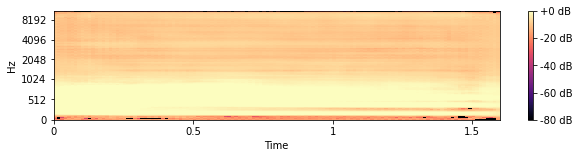

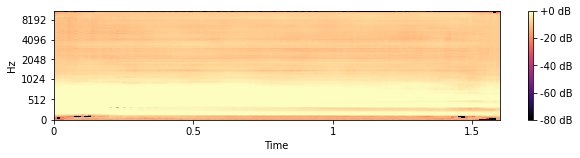

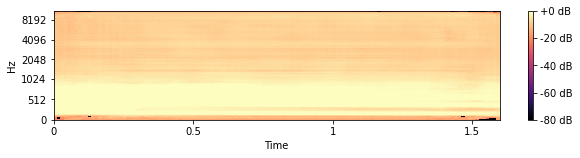

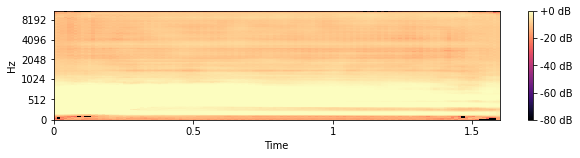

In [5]:
plot_improvement('B', 0, 100)

## Loss Graphs

Initialising method and loading main dictionary

In [7]:
def plot_train_hist(train_hist, names, title, ylim=None):
    x = range(len(train_hist[names[0]]))

    plt.figure()
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    
    for n in names:
        plt.plot(x, train_hist[n], label=n)

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    if(ylim): plt.ylim(ylim)
    
train_hist = load_pickle('pool/'+n+'/train_hist.pickle')

### Generator A2B Path

In [ ]:
plot_train_hist(train_hist, ['enc_A', 'dec_A2B', 'dec_ABA'], 'Generator A2B Losses', ylim=(0,100))

### Generator B2A Path

In [ ]:
plot_train_hist(train_hist, ['enc_B', 'dec_B2A', 'dec_BAB'], 'Generator B2A Losses', ylim=(0,100))

### Discriminators A and B

In [ ]:
plot_train_hist(train_hist, ['disc_A', 'disc_B'], 'Discriminator Losses', ylim=(0,0.5))